In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the images
main_path = "/Users/izzymohamed/Desktop/Vision For Social Good/DATA/Cherry/03_11_2021/Ground_Multispectral_Photos/Armillaria_Stage_1/2-16"


# Construct the full paths for each image
green_path = os.path.join(main_path, 'IMG_700101_001417_0000_GRE.TIF')
nir_path = os.path.join(main_path, 'IMG_700101_001417_0000_NIR.TIF')
red_path = os.path.join(main_path, 'IMG_700101_001417_0000_RED.TIF')
red_edge_path = os.path.join(main_path, 'IMG_700101_001417_0000_REG.TIF')
rgb_path = os.path.join(main_path, 'IMG_700101_001418_0000_RGB.JPG')

In [3]:
# Load the images
green = cv2.imread(green_path, cv2.IMREAD_GRAYSCALE)
nir = cv2.imread(nir_path, cv2.IMREAD_GRAYSCALE)
red = cv2.imread(red_path, cv2.IMREAD_GRAYSCALE)
red_edge = cv2.imread(red_edge_path, cv2.IMREAD_GRAYSCALE)
rgb = cv2.imread(rgb_path)

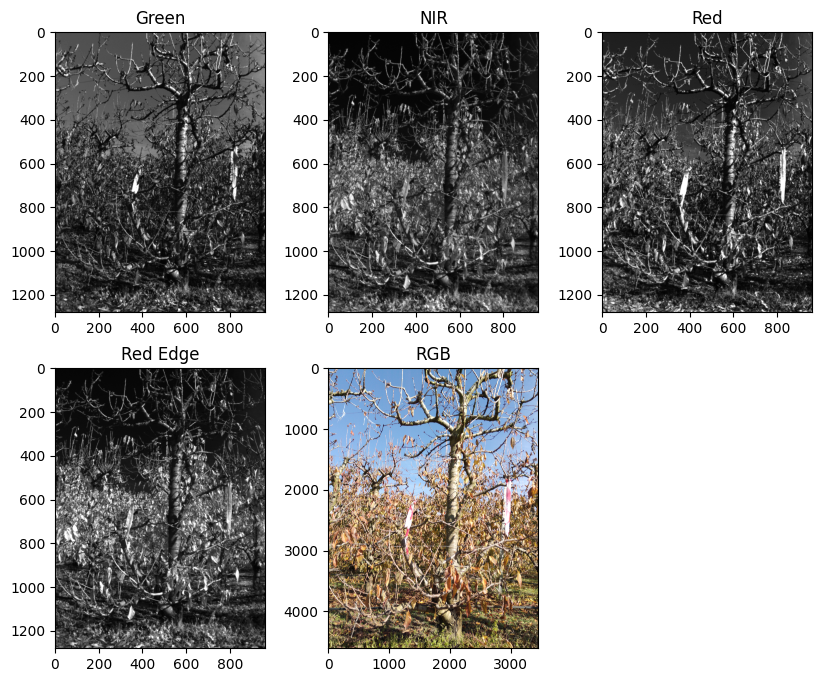

In [4]:
# Display the images
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.title('Green')
plt.imshow(green, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('NIR')
plt.imshow(nir, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Red')
plt.imshow(red, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Red Edge')
plt.imshow(red_edge, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('RGB')
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))

plt.show()

In [8]:
# Read parameter and diagnostic data
with open(os.path.join(main_path, 'sequoia_param.dat'), 'r', encoding='latin-1') as param_file:
    param_data = param_file.readlines()

with open(os.path.join(main_path, 'sequoia_diag.dat'), 'r', encoding='latin-1') as diag_file:
    diag_data = diag_file.readlines()

# print("Parameter Data:")
# print(param_data)

print("\nDiagnostic Data:")
print(diag_data)


Diagnostic Data:
['---------------------------------------------------- beginning of /proc/kmsg\n', '====================== ULOGCAT SESSION START  ======================\n', 'K 01-01 00:00:00.000 I KERNEL                                       : Booting Linux on physical CPU 0\n', 'K 01-01 00:00:00.000 I KERNEL                                       : Initializing cgroup subsys cpu\n', 'K 01-01 00:00:00.000 N KERNEL                                       : Linux version 3.4.11-02620-g98244c003e1 (jenkins@84c2bc296a21) (gcc version 4.6.3 (Sourcery CodeBench Lite 2012.03-57) ) #1 SMP PREEMPT Mon Dec 4 15:13:12 UTC 2017\n', 'K 01-01 00:00:00.000 W KERNEL                                       : CPU: ARMv7 Processor [412fc097] revision 7 (ARMv7), cr=10c53c7d\n', 'K 01-01 00:00:00.000 W KERNEL                                       : CPU: PIPT / VIPT nonaliasing data cache, VIPT aliasing instruction cache\n', 'K 01-01 00:00:00.000 W KERNEL                                       : Machine: Sicili

In [13]:
import cv2
import numpy as np

# Load the multispectral image
image = cv2.imread(rgb_path, -1)  # Load as is

# Split the image into individual bands
nir = image[:, :, 0]  # Assuming NIR is the first channel
red = image[:, :, 1]  # Assuming Red is the second channel
red_edge = image[:, :, 2]  # Assuming Red Edge is the third channel

In [14]:
nir = nir / 255.0
red = red / 255.0
red_edge = red_edge / 255.0

In [15]:
def calculate_ndvi(nir, red):
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calculate_ndvi(nir, red)

/var/folders/qd/ds8njzhn1zv9q727vvvr8h0m0000gn/T/ipykernel_73268/833536345.py:2: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


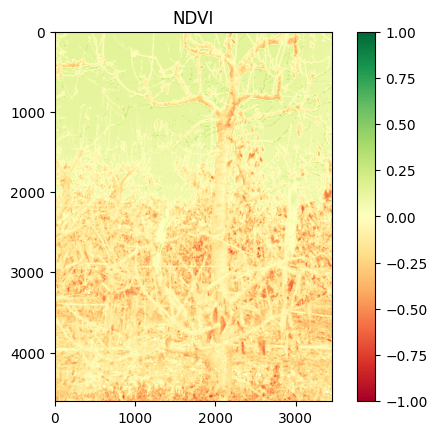

In [16]:
import matplotlib.pyplot as plt

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.show()

In [ ]:
import sys
import math
import cv2 as cv
import numpy as np
from PIL import Image, ImageOps, ImageChops 
import PIL
import matplotlib.pyplot as plt

red = Image.open("arnisa_red.tif")
nir = Image.open("arnisa_nir.tif")
rededge = Image.open("arnissa_rededge.tif")

nir = np.asarray(nir)
red = np.asarray(red)
rededge = np.asarray(rededge)
ndvi = np.zeros([nir.shape[0], nir.shape[1], 3], dtype=np.uint8) 
ndviData = np.zeros(nir.shape[0])
ndviData = (nir - red) / (nir + red)
for i in range(0, ndviData.shape[0]):
       for j in range(0, ndviData.shape[1]):
        if (ndviData[i][j] < 0):
            ndvi[i][j][0] = 0
            ndvi[i][j][1] = 0
            ndvi[i][j][2] = 0
        elif (ndviData[i][j] > 0):
            if(ndviData[i][j] > 0 and ndviData[i][j] < 0.06):
                ndvi[i][j][0] =  255
                ndvi[i][j][1] = 0
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.06 and ndviData[i][j] < 0.12): 
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 32
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.12 and ndviData[i][j] < 0.18):
                ndvi[i][j][0] =  255
                ndvi[i][j][1] = 64
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.18 and ndviData[i][j] < 0.24): 
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 96
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.24 and ndviData[i][j] < 0.30): 
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 128
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.30 and ndviData[i][j] < 0.36): 
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 160
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.36 and ndviData[i][j] < 0.42): 
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 192
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.42 and ndviData[i][j] < 0.48): 
                ndvi[i][j][0] = 255
                ndvi[i][j][1] = 224
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.48 and ndviData[i][j] < 0.54):
                    ndvi[i][j][0] =  255
                    ndvi[i][j][1] = 240
                    ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.54 and ndviData[i][j] < 0.60): 
                ndvi[i][j][0] = 224
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.60 and ndviData[i][j] < 0.66): 
                ndvi[i][j][0] = 192
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.66 and ndviData[i][j] < 0.72): 
                ndvi[i][j][0] = 176
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.72 and ndviData[i][j] < 0.78): 
                ndvi[i][j][0] = 160
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.78 and ndviData[i][j] < 0.84): 
                ndvi[i][j][0] = 144
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j] > 0.84 and ndviData[i][j] < 0.90):
                ndvi[i][j][0] =  64
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0
            elif (ndviData[i][j]> 0.90):
                ndvi[i][j][0] =  16
                ndvi[i][j][1] = 255
                ndvi[i][j][2] = 0

pil_image=Image.fromarray(ndvi)
img = pil_image
img = img.convert("RGBA")
datas = img.getdata()
newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255: 
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("ndvi_agr.png", "PNG")